# Simplified Implementation of DeepONets

This notebook provides a simplified implementation of DeepONets using PyTorch. DeepONets are a type of neural network designed to approximate operators, mapping functions to functions.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Generate Training Data
We use a simple function for demonstration: the sine operator. Given an input function $u(x)$, the operator maps it to $v(x) = \sin(u(x))$. This serves as the target for the DeepONet.

In [2]:
def generate_training_data(n_samples=1000, n_points=50):
    x = np.linspace(0, 2 * np.pi, n_points)
    u = np.random.uniform(-1, 1, (n_samples, n_points))
    v = np.sin(u)
    return x, u, v

x, u, v = generate_training_data()
print(f"Input shape: {u.shape}, Output shape: {v.shape}")

Input shape: (1000, 50), Output shape: (1000, 50)


## Define DeepONet Architecture
DeepONets consist of two subnetworks:
- The **branch network**, which processes the input function values $u$.
- The **trunk network**, which processes the spatial variable $x$.

In [6]:
class DeepONet(nn.Module):
    def __init__(self, branch_dim=50, trunk_dim=50, hidden_dim=64):
        super(DeepONet, self).__init__()
        self.branch_net = nn.Sequential(
            nn.Linear(branch_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        self.trunk_net = nn.Sequential(
            nn.Linear(trunk_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, u, x):
        branch_out = self.branch_net(u)
        trunk_out = self.trunk_net(x)
        combined = branch_out * trunk_out
        return self.output_layer(combined)

model = DeepONet()
print(model)

DeepONet(
  (branch_net): Sequential(
    (0): Linear(in_features=50, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
  (trunk_net): Sequential(
    (0): Linear(in_features=50, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)


## Training the Model
We train the DeepONet using mean squared error (MSE) loss.

In [7]:
def train_model(model, u_train, x_train, v_train, epochs=1000, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Convert data to tensors
        u_train_tensor = torch.tensor(u_train, dtype=torch.float32)
        x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
        v_train_tensor = torch.tensor(v_train, dtype=torch.float32)

        # Forward pass
        v_pred = model(u_train_tensor, x_train_tensor)
        loss = loss_fn(v_pred, v_train_tensor)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Example: training data (simplified)
u_train = u[:800]
x_train = np.tile(x, (800, 1))
v_train = v[:800]

train_model(model, u_train, x_train, v_train)

c:\Users\2924746\Anaconda3\envs\gpuenv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([800, 50])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.2796
Epoch 100, Loss: 0.2665
Epoch 200, Loss: 0.2665
Epoch 300, Loss: 0.2665
Epoch 400, Loss: 0.2665
Epoch 500, Loss: 0.2665
Epoch 600, Loss: 0.2665
Epoch 700, Loss: 0.2665
Epoch 800, Loss: 0.2665
Epoch 900, Loss: 0.2665


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

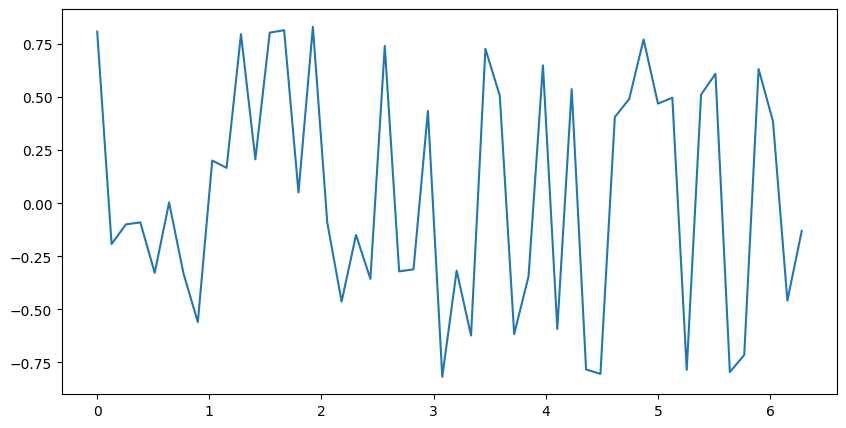

In [8]:

## Testing the Model (Corrected)
# Ensure tensor shapes match and forward pass works
u_test = u[800:]
x_test = np.tile(x, (u_test.shape[0], 1))
v_test = v[800:]

# Convert to PyTorch tensors
u_test_tensor = torch.tensor(u_test, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Forward pass and visualization
with torch.no_grad():
    v_pred = model(u_test_tensor, x_test_tensor).numpy()

# Plot true vs predicted outputs
plt.figure(figsize=(10, 5))
plt.plot(x, v_test[0], label="True Output")
plt.plot(x, v_pred[0], label="Predicted Output", linestyle="dashed")
plt.legend()
plt.title("Comparison of True and Predicted Outputs")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

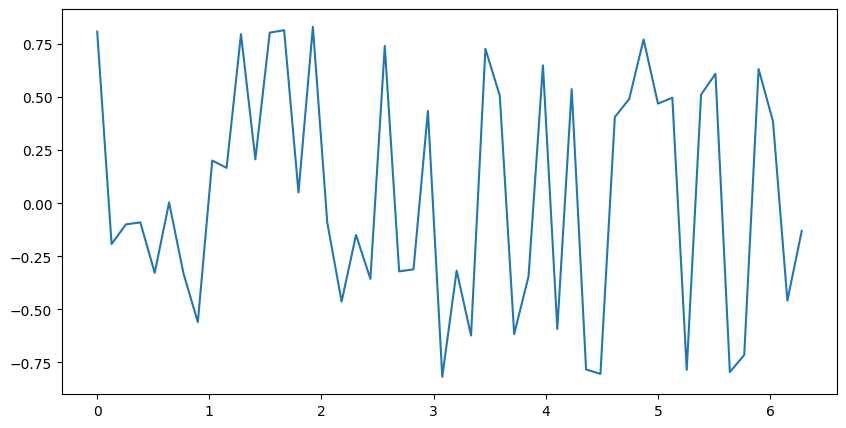

In [9]:
u_test = u[800:]
x_test = np.tile(x, (200, 1))
v_test = v[800:]

with torch.no_grad():
    u_test_tensor = torch.tensor(u_test, dtype=torch.float32)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    v_pred = model(u_test_tensor, x_test_tensor).numpy()

plt.figure(figsize=(10, 5))
plt.plot(x, v_test[0], label='True')
plt.plot(x, v_pred[0], label='Predicted', linestyle='dashed')
plt.legend()
plt.title('Comparison of True and Predicted Output')
plt.show()